<h3 align="right">Felix Filipi</h3>
<h3 align="right">2301877590</h3>

<h1 align="center">Case 1</h1>
<h1 align="center">Deep Learning</h1>

<hr>

<h1> 1</h1>

Your task is to implement a backpropagation algorithm on a
simple Back Propagation Neural Network (BPNN) architecture [The implementation can use
Tensorflow or PyTorch framework]. The baseline architecture is consisting of n nodes in the input
layer, 2 neurons in the hidden layer and 1 neuron in the output layer (n, 2, 1) with n is number of
used inputs.

Now, based on that simple BPNN python codes, develop a new model of BPNN capable of tackling
a binary classification task. Please employ datasets taken from Income dataset in Kaggle (
https://www.kaggle.com/mastmustu/income ). You can use all inputs in the dataset or just choose
the part of it. The architecture of your new BPNN model must be adjusted accordingly. Your
python notebook codes must include the computation of:

<b>a. [20 points] Training accuracy and validation curves as a function of number of epochs. Try
to reach the best accuracy by adjusting the hidden layer and all hyperparameter. You will
be graded based on your final accuracy comparing the baseline architecture (n,2,1)

<b>b. [10 points] Performance analysis based of Testing dataset (find precision, recall, F1-score,
and accuracy) of the model based on the associated confusion matrix.

</hr>

We are asked to implement the backpropagation algorithm on the Multi-Layer Perceptron (MLP) architecture which consists of n input neurons, 2 hidden neurons, and 1 output neuron. Here I will use keras framework from tensorflow to make programming easier. But instead, I will still explain the steps needed to do backpropagation, precisely gradient descent later.

<b>First, we have to import some libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

<b>After that, we need to load the requested data, because it consists of a train and a test set, so we load both of them

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


<h2> After load the data, we need to preprocess it.</h2>

I will divide the preprocessing into 4 steps:

1. Balance the amount of data (fix imbalanced data)
2. Label encoding, converting categorical data into numeric data
3. Scaling data using MinMaxScaler

Let's go to the first stage. First, before balancing the data, we need to know in advance, whether the existing data is balanced or not. Why do we have to balance the data? Because unbalanced data causes our model to be unbalanced too. For example, we have 1000 data apples, and 10 data oranges to train. This of course will make the model high bias low variance so it will almost always predict it as apple data. Then, does the neural network works similar with imbalanced data? The answer is Yes.

The following is the source of the statement that imbalanced data will affect the neural network model.
https://machinelearningmastery.com/cost-sensitive-neural-network-for-imbalanced-classification/

"Neural network models are commonly trained using the backpropagation of error algorithm. ... As a result, these algorithms can perform well on the balanced data sets while their performance cannot be guaranteed on imbalanced data sets"

Okay, now we will check whether our data is imbalanced or not.

In [3]:
temp_label = train.iloc[:,-1:].values
counts = np.unique(temp_label, return_counts = True)
counts

(array([0, 1]), array([33439, 10518]))

It can be seen above that the data is not balanced, where there are 30 thousand data for the no class, while 10 thousand data for the yes class, therefore we need to balance it.

In [4]:
counts = counts[1][1]
sample_yes = train[temp_label == 1].sample(n = counts, replace = False, random_state = 0)
sample_no = train[temp_label == 0].sample(n = counts,replace = False, random_state = 0)
balanced_set = pd.concat([sample_yes, sample_no])
balanced_set.shape

(21036, 15)

In [5]:
balanced_set

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
4071,63,Private,181929,HS-grad,9,Widowed,Exec-managerial,Unmarried,White,Male,0,0,50,United-States,1
13697,39,Private,170174,Assoc-voc,11,Never-married,Adm-clerical,Own-child,White,Male,14344,0,40,United-States,1
39089,32,Local-gov,43959,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
17385,45,Private,353824,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,1
24231,36,Federal-gov,403489,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5123,58,Federal-gov,26947,Bachelors,13,Widowed,Prof-specialty,Unmarried,Amer-Indian-Eskimo,Female,0,0,40,United-States,0
34584,45,Private,166879,11th,7,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,0
32592,67,Private,174603,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,35,United-States,0
35119,25,Private,173212,Assoc-acdm,12,Never-married,Farming-fishing,Not-in-family,White,Male,2354,0,45,United-States,0


<b>Let's see, do the labels have the same shape?

In [6]:
np.unique(balanced_set.iloc[:,-1:], return_counts = True)

(array([0, 1]), array([10518, 10518]))

We have successfully carried out the first stage of preprocessing, namely correcting imbalanced data. Now we need to do the next stage of preprocessing which is label encoding. But before that, we need to define which are features and which are labels. Therefore we need to check the correlation between features. Why do we need to check the correlation? Because we want to know whether the features are highly correlated or not.

If there are features whose correlation is too high, then we need to drop one of them. Because it will make the feature imbalanced. Let's say we have 2 features that have a very high correlation, then these two features will be considered similar in our model so that they become stronger than the other features. Okay, let's check first

In [7]:
train.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
age,1.000000,-0.076895,0.034711,0.075839,0.056635,0.070949,0.230988
fnlwgt,-0.076895,1.000000,-0.040696,-0.003357,-0.006303,-0.011642,-0.006852
educational-num,0.034711,-0.040696,1.000000,0.126740,0.081004,0.145670,0.334035
capital-gain,0.075839,-0.003357,0.126740,1.000000,-0.031507,0.082729,0.223325
capital-loss,0.056635,-0.006303,0.081004,-0.031507,1.000000,0.055112,0.145250
hours-per-week,0.070949,-0.011642,0.145670,0.082729,0.055112,1.000000,0.227918
income_>50K,0.230988,-0.006852,0.334035,0.223325,0.145250,0.227918,1.000000


After we check, it turns out that there is no significant correlation here. Usually if the correlation is above 0.8 will be dropped, but also depending on the opinions of the programmer, some will drop if the correlation is above 0.6 and others have their own criteria too. Because there is no high correlation, then we can define which feature and label are now.

Since I think all the available features are important enough and make sense to define whether someone has an income above 50k, then I will include all these features in training our model later. Let's separate which feature and which target.

In [8]:
feature = balanced_set.iloc[:,:-1]
target = balanced_set.iloc[:,-1:]
feature

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
4071,63,Private,181929,HS-grad,9,Widowed,Exec-managerial,Unmarried,White,Male,0,0,50,United-States
13697,39,Private,170174,Assoc-voc,11,Never-married,Adm-clerical,Own-child,White,Male,14344,0,40,United-States
39089,32,Local-gov,43959,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
17385,45,Private,353824,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States
24231,36,Federal-gov,403489,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5123,58,Federal-gov,26947,Bachelors,13,Widowed,Prof-specialty,Unmarried,Amer-Indian-Eskimo,Female,0,0,40,United-States
34584,45,Private,166879,11th,7,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States
32592,67,Private,174603,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,35,United-States
35119,25,Private,173212,Assoc-acdm,12,Never-married,Farming-fishing,Not-in-family,White,Male,2354,0,45,United-States


After divide the features and labels, then we can proceed to our second preprocessing stage, namely label encoding. Because the data is categorical, for example Private, Local-gov and others, then we need to convert it to numeric data so that it can be read properly by our model later.

In [9]:
encoder = LabelEncoder()
feature = feature.apply(encoder.fit_transform)
feature

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
4071,46,3,7495,11,8,6,3,4,4,1,0,0,49,37
13697,22,3,6632,8,10,4,0,3,4,1,102,0,39,37
39089,15,1,864,9,12,2,9,0,4,1,0,0,39,37
17385,28,3,13692,15,9,2,5,0,4,1,0,0,39,37
24231,19,0,14245,12,13,2,9,0,4,1,0,0,44,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5123,41,0,136,9,12,6,9,4,0,0,0,0,39,37
34584,28,3,6379,1,6,0,2,1,4,1,0,0,39,37
32592,50,3,6929,11,8,4,3,1,4,0,0,0,34,37
35119,8,3,6821,7,11,4,4,1,4,1,30,0,44,37


We have finished doing the second preprocessing stage, then we go to the last preprocessing stage, which is data scaling. We need to do this scaling because our data has a different scale from each other, for example hours per week, if we compare it to the workclass it will have a different scale. Therefore to balance it, we need to do the scaling earlier. To make programming easier, we just call an existing function from scikit learn MinMaxScaler, as follows.

In [10]:
scaler = MinMaxScaler()
feature = scaler.fit_transform(feature)
feature

array([[0.64788732, 0.375     , 0.50410277, ..., 0.        , 0.54444444,
        0.925     ],
       [0.30985915, 0.375     , 0.44605865, ..., 0.        , 0.43333333,
        0.925     ],
       [0.21126761, 0.125     , 0.05811138, ..., 0.        , 0.43333333,
        0.925     ],
       ...,
       [0.70422535, 0.375     , 0.46603444, ..., 0.        , 0.37777778,
        0.925     ],
       [0.11267606, 0.375     , 0.45877051, ..., 0.        , 0.48888889,
        0.925     ],
       [0.18309859, 0.375     , 0.38451708, ..., 0.        , 0.75555556,
        0.925     ]])

<b> Now, we need to split this set to become a testing dataset. Why? because the testing set provided by the case didn't provide any label for testing. Meanwhile, the instruction asked us to find precision, recall, F1-score, and accuracy, and that's not possible to be done. So, the easiest way to resolve it is by splitting the set become testing and training and ignoring the testing set provided, since the testing set and the training set actually have the same functionality.</b>

So to accomplish this, we just need to call the function ```train_test_split``` like this. 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, shuffle=True)

This X_test will be used later in the performance analysis section

Because we need to use n layers as our input layer, where n is the number of inputs used, we need to find out how many input that will be used.

In [12]:
X_train.shape

(16828, 14)

We will now go into the discussion of our neural network model. Here, as requested by the case study, we will create a similar architecture, with (n,2,1)  as our model architecture. And we will use 14 as input layer, following the case request, where n is the number of used inputs and we have 14 inputs to use, so the architecture becomes like this.

In [13]:
model = Sequential()

#input layer
model.add(Dense(14, input_shape=(14,),activation='relu'))

#hidden layer
model.add(Dense(2, activation='relu'))

#output layer
model.add(Dense(1, activation='sigmoid'))

2021-11-20 22:39:06.846139: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-20 22:39:06.858405: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2021-11-20 22:39:06.858439: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2021-11-20 22:39:06.859080: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

Here we will use the relu activation function in the input and hidden layers, and use sigmoid on the output layer, here I have tried to do tuning, where the best result is using relu, when I try to use the sigmoid activation function, the accuracy value given by the model will decrease. Therefore, we will present it using our best scenario, namely by using relu. In summary, we can also display information about our architecture, with the following functions

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                210       
                                                                 
 dense_1 (Dense)             (None, 2)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


<h2>Now we will go into the discussion about the implementation of backpropagation.</h2>

As I promised earlier, here I will explain about the backpropagation using gradient descent algorithm. Gradient descent itself is an algorithm for updating weight which is used to train our model to understand the data, or in easier words, backpropagation is how this neural network algorithm learns.

For the backpropagation process itself, it actually consists of a formula that is usually written as:

<b>new weight = old weight - learning_rate . derivative of (error/w) </b>

Or can be written in the mathematical formula as:

$W_{new} = W_{old} - \alpha . \frac{\theta error}{\theta w}$ 

The new weight is what the backpropagation looks for. But in order to achieve that, we need to find the derivative of (error/w) which needs a chain rule & partial derivation to find it. The chain rule is needed because we are looking for the derivative of (error/w) . So, to get the derivative of (error/w) we need to calculate the other function as well. So the concept of the chain rule is something like this: 

1. Before doing backpropagation we need to do forward propagation in the sequence as follows.
- z = w.x + b
- a = activation funcion(z)
- error = (a-y)^2

2. We are going to get the derivative of (error/w), but if we are looking for the weight, then we need to get it from z. So the formula to get the derivative of (error/w) will become like this:

$\frac{\theta error}{\theta w} = \frac{\theta error}{\theta \alpha} \cdot \frac{\theta \alpha}{\theta z} \cdot \frac{\theta z}{\theta w}$

So according to this formula, the error is now able to be derivated by w. But if we are going to do the native derivate one by one it will take a lot of useless computational cost and time. Because we just need some value of it and the rest of it is just a constant. So, to optimize it then we can do the derivative using a partial derivative . So, we can only derivate what we need. As example:

The partial derivative of (z/w1) = (x1.w1 + x2.w2 + ... + b) / w1 = x1 (only do the derivative of x1.w1)

To make it clear, here's the summary of chain rule which will be used to search the new weight

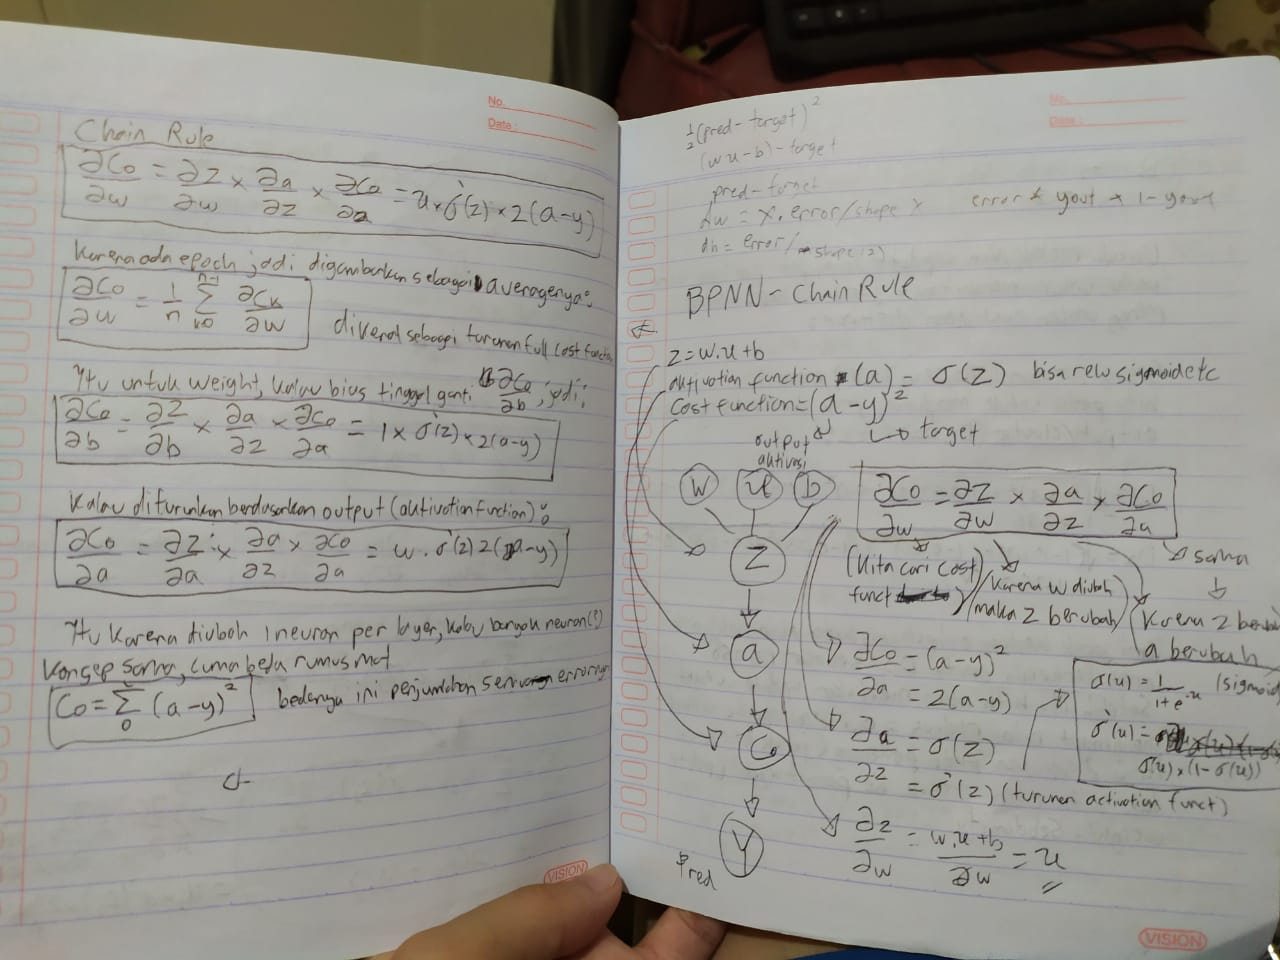

So, after we got the chain rule, then we can go subtitute it with in this formula

$W_{new} = W_{old} - \alpha . \frac{\theta error}{\theta w}$ 

and get the new weight. 

<b>Now back to our code, here we will use binary_crossentropy as a loss function because our output is a binary classification. And use stochastic gradient descent optimizer as backpropagation algorithm.

In [15]:
model.compile(loss='binary_crossentropy', optimizer = 'sgd', metrics=['accuracy'])

<h2> Training Process</h2>

In [16]:
history = model.fit(feature,target,epochs = 40, validation_split=0.2)

Epoch 1/40
526/526 [==============================] - 2s 2ms/step - loss: 0.6685 - accuracy: 0.6280 - val_loss: 0.8626 - val_accuracy: 0.0000e+00
Epoch 2/40
526/526 [==============================] - 1s 2ms/step - loss: 0.6477 - accuracy: 0.6250 - val_loss: 0.8965 - val_accuracy: 2.3764e-04
Epoch 3/40
526/526 [==============================] - 1s 2ms/step - loss: 0.6290 - accuracy: 0.6454 - val_loss: 0.8499 - val_accuracy: 0.2346
Epoch 4/40
526/526 [==============================] - 1s 2ms/step - loss: 0.6037 - accuracy: 0.6777 - val_loss: 0.7994 - val_accuracy: 0.3997
Epoch 5/40
526/526 [==============================] - 1s 2ms/step - loss: 0.5771 - accuracy: 0.7211 - val_loss: 0.7735 - val_accuracy: 0.4648
Epoch 6/40
526/526 [==============================] - 1s 2ms/step - loss: 0.5513 - accuracy: 0.7423 - val_loss: 0.7181 - val_accuracy: 0.5261
Epoch 7/40
526/526 [==============================] - 1s 2ms/step - loss: 0.5262 - accuracy: 0.7550 - val_loss: 0.6622 - val_accuracy: 0.565

Here we get an accuracy of 83.5%, which is good enough to classify this data. But after I tried to tune the training using another optimizer, it turned out that Adam gave a higher accuracy than this gradient descent algorithm. However, to be consistent with what explained in the theory above, I will display the training results based on gradient descent above.

<h3>A. Training accuracy and validation curves as a function of number of epochs.

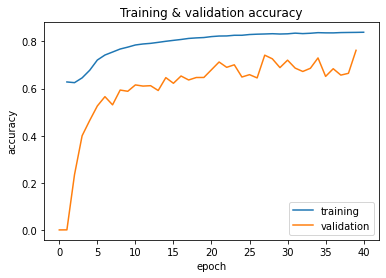

In [17]:
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs,history.history['accuracy'],history.history['val_accuracy'])
plt.title('Training & validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training','validation'])
plt.show()

<h3>B.  Performance analysis based of Testing dataset (find precision, recall, F1-score, and accuracy) of the model based on the associated confusion matrix.

<b> Accuracy

In [18]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss = {loss}")
print(f"Accuracy = {round(accuracy*100,2)}%")

Loss = 0.40295150876045227
Accuracy = 81.06%


<b> As we can see here, the test set return accuracy about 81,51% which is good enough to classify this model.

<h3>Precision, recall and f1-score

In [19]:
y_pred = model.predict(X_test)
y_pred = np.around(y_pred).reshape(-1).astype(int)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      2130
           1       0.78      0.86      0.82      2078

    accuracy                           0.81      4208
   macro avg       0.81      0.81      0.81      4208
weighted avg       0.81      0.81      0.81      4208



<h3>Confusion Matrix

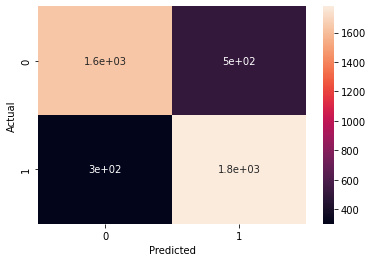

In [20]:
y_test = y_test.values.reshape(-1)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()